In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

In [2]:
data = pd.read_csv("police_shooting_data.csv")

In [3]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
date                              0
name                            582
age                             605
gender                           49
armed                           210
race                              0
city                             57
state                             0
flee                           1190
body_camera                       0
signs_of_mental_illness           0
police_departments_involved       0
dtype: int64


In [4]:
# Fill missing values in "gender," "armed," and "flee" columns with 'Value Missing'
data['gender'].fillna('unknown', inplace=True)
data['armed'].fillna('unknown', inplace=True)
data['flee'].fillna('unknown', inplace=True)

missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
date                             0
name                           582
age                            605
gender                           0
armed                            0
race                             0
city                            57
state                            0
flee                             0
body_camera                      0
signs_of_mental_illness          0
police_departments_involved      0
dtype: int64


In [5]:
data['date'] = pd.to_datetime(data['date'])
data['body_camera'] = data['body_camera'].astype(bool)

In [6]:
categorical_vars = ['race', 'gender', 'armed', 'flee']
for var in categorical_vars:
    print("\nValue Counts for", var)
    print(data[var].value_counts())


Value Counts for race
race
White              3763
Black              1990
Unknown            1419
Hispanic           1311
Asian               146
Native American     117
Other                21
Black,Hispanic        1
Name: count, dtype: int64

Value Counts for gender
gender
male          8336
female         382
unknown         49
non-binary       1
Name: count, dtype: int64

Value Counts for armed
armed
gun                          5082
knife                        1470
unarmed                       515
unknown                       348
undetermined                  347
vehicle                       309
replica                       288
blunt_object                  216
other                          88
gun,vehicle                    38
gun,knife                      35
vehicle,gun                    15
other,gun                       4
knife,vehicle                   3
blunt_object,knife              2
blunt_object,blunt_object       2
knife,blunt_object              2
replica,vehi

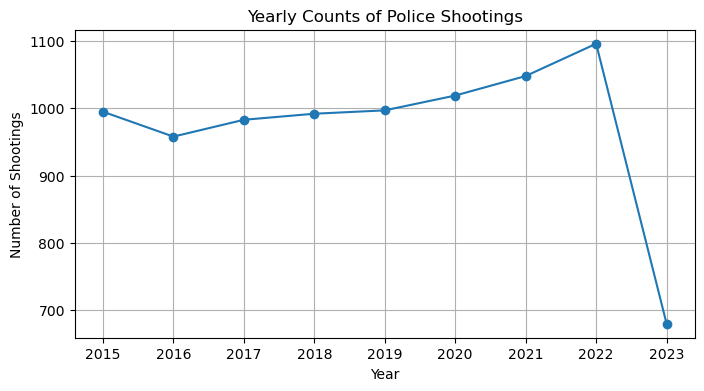

In [7]:
data['year'] = data['date'].dt.year

yearly_counts = data['year'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title('Yearly Counts of Police Shootings')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.grid(True)
plt.show()



Chi-squared Test between Body Camera and Race:
Chi2 Statistic: 84.59871505920358
p-value: 1.5837523544063925e-15


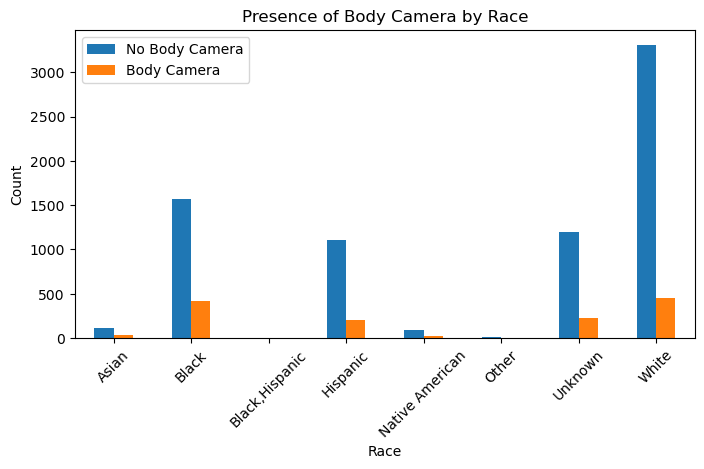

In [8]:
# Relationship between body_camera and race
contingency_table = pd.crosstab(data['body_camera'], data['race'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-squared Test between Body Camera and Race:")
print("Chi2 Statistic:", chi2)
print("p-value:", p)

# Group the data by 'race' and 'body_camera' and count the occurrences
race_camera_counts = data.groupby(['race', 'body_camera']).size().unstack().fillna(0)

# Create a grouped bar chart
race_camera_counts.plot(kind='bar', figsize=(8, 4))
plt.title("Presence of Body Camera by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(["No Body Camera", "Body Camera"])
plt.show()


Chi-squared Test between Body Camera and Gender:
Chi2 Statistic: 8.806147038401972
p-value: 0.03198244795091054


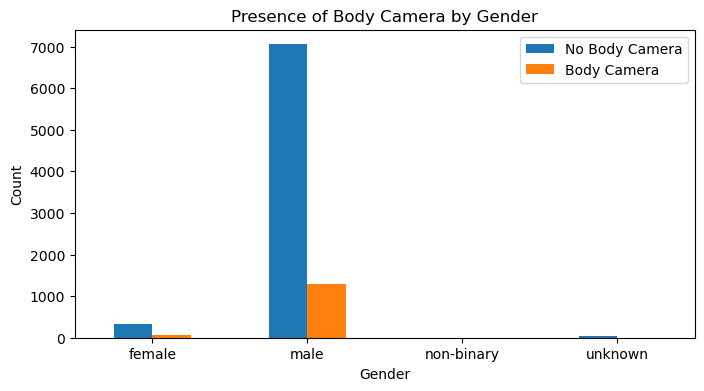

In [9]:
# Relationship between body_camera and gender
contingency_table = pd.crosstab(data['body_camera'], data['gender'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-squared Test between Body Camera and Gender:")
print("Chi2 Statistic:", chi2)
print("p-value:", p)

# Group the data by 'gender' and 'body_camera' and count the occurrences
gender_camera_counts = data.groupby(['gender', 'body_camera']).size().unstack().fillna(0)

# Create a grouped bar chart
gender_camera_counts.plot(kind='bar', figsize=(8, 4))
plt.title("Presence of Body Camera by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(["No Body Camera", "Body Camera"])
plt.show()



Chi-squared Test between Body Camera and Armed:
Chi2 Statistic: 79.61078354276566
p-value: 4.570553686730119e-09


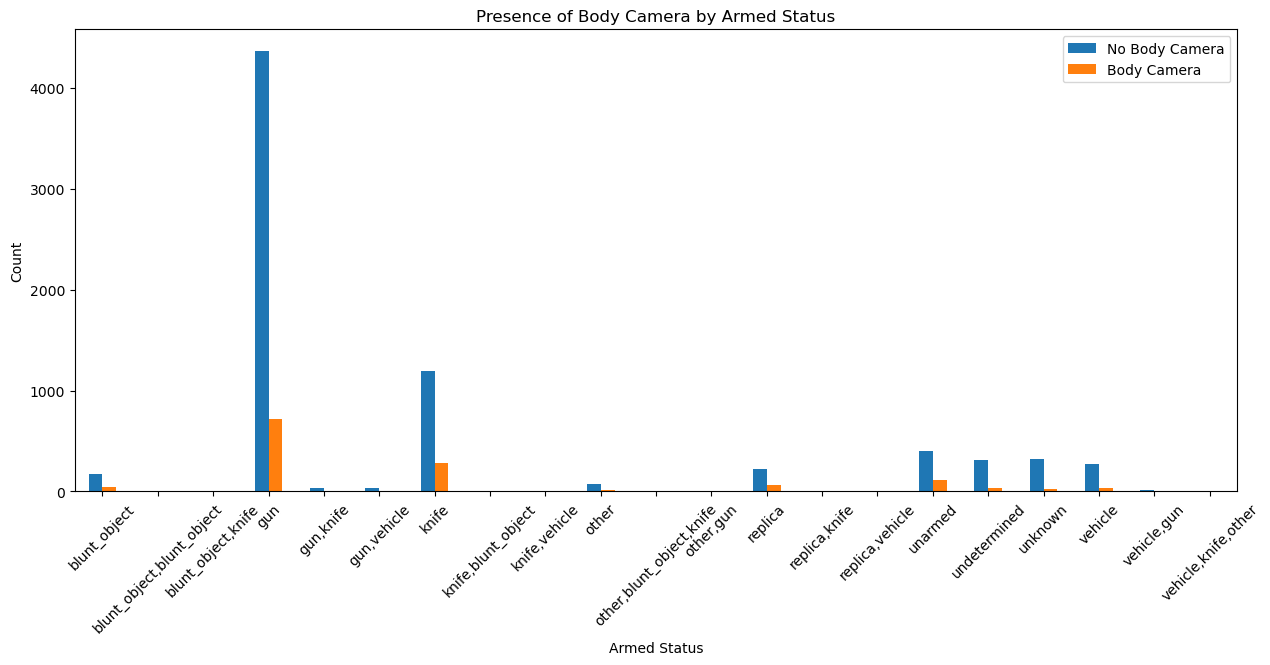

In [10]:
# Relationship between body_camera and armed
contingency_table = pd.crosstab(data['body_camera'], data['armed'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-squared Test between Body Camera and Armed:")
print("Chi2 Statistic:", chi2)
print("p-value:", p)

# Group the data by 'armed' and 'body_camera' and count the occurrences
armed_camera_counts = data.groupby(['armed', 'body_camera']).size().unstack().fillna(0)

# Create a grouped bar chart
armed_camera_counts.plot(kind='bar', figsize=(15, 6))
plt.title("Presence of Body Camera by Armed Status")
plt.xlabel("Armed Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(["No Body Camera", "Body Camera"])
plt.show()


Chi-squared Test between Body Camera and Armed:
Chi2 Statistic: 31.300560651378106
p-value: 2.6582214861381935e-06


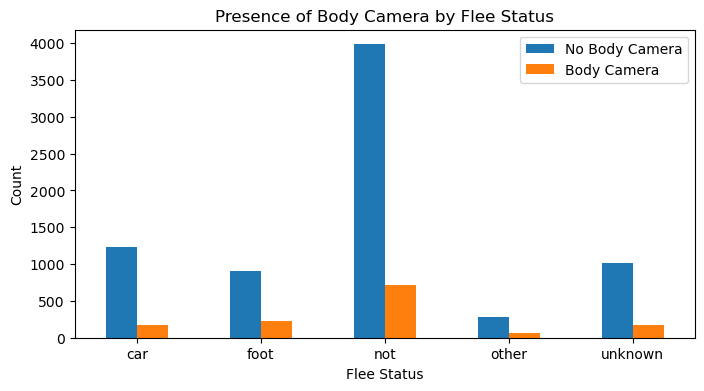

In [11]:
# Relationship between body_camera and flee
contingency_table = pd.crosstab(data['body_camera'], data['flee'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-squared Test between Body Camera and Armed:")
print("Chi2 Statistic:", chi2)
print("p-value:", p)

# Group the data by 'flee' and 'body_camera' and count the occurrences
flee_camera_counts = data.groupby(['flee', 'body_camera']).size().unstack().fillna(0)

# Create a grouped bar chart
flee_camera_counts.plot(kind='bar', figsize=(8, 4))
plt.title("Presence of Body Camera by Flee Status")
plt.xlabel("Flee Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(["No Body Camera", "Body Camera"])
plt.show()

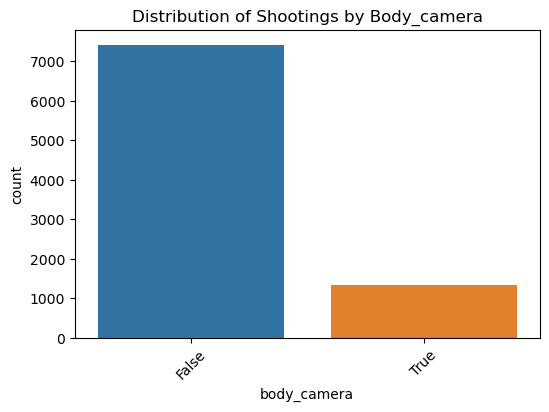

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='body_camera')
plt.title("Distribution of Shootings by Body_camera")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Extract the counts of males and females when there is no body camera
male_without_camera = data[(data['gender'] == 'male') & (data['body_camera'] == False)].shape[0]
female_without_camera = data[(data['gender'] == 'female') & (data['body_camera'] == False)].shape[0]
total_without_camera = data[data['body_camera'] == False].shape[0]

# Create arrays for observed and expected values
observed = [male_without_camera, female_without_camera]
expected = [total_without_camera / 2, total_without_camera / 2]  # Assuming equal proportions

# Perform the proportions z-test
z_stat, p_value = proportions_ztest(observed, expected)

print("\nHypothesis Testing for Gender Bias without Body Camera:")
print("Z-statistic:", z_stat)
# print("p-value:", p_value)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant gender bias when there is no body camera.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no strong evidence of gender bias when there is no body camera.")


Hypothesis Testing for Gender Bias without Body Camera:
Z-statistic: 994.7821139736093
Reject the null hypothesis.
There is a statistically significant gender bias when there is no body camera.


In [18]:
# Calculate Cohen's h (effect size) for gender bias without a body camera
effect_size = 2 * norm.cdf(-abs(z_stat))  # Calculate the effect size

# print("\nEffect Size (Cohen's h) for Gender Bias without Body Camera:", effect_size)

# Interpret the effect size
if effect_size < 0.10:
    print("The effect size is small.")
elif effect_size < 0.30:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

# Determine which gender has more bias (male or female) and by how much
if observed[0] > observed[1]:
    print("Female has more bias by", observed[0] - observed[1], "cases.")
elif observed[0] < observed[1]:
    print("Male has more bias by", observed[1] - observed[0], "cases.")
else:
    print("There is an equal number of cases for male and female bias.")


The effect size is small.
Female has more bias by 6726 cases.


In [19]:
# Extract the counts of rows with "Unknown" values when there is no body camera
unknown_without_camera = data[(data['body_camera'] == False) & ((data['gender'] == 'Unknown') | (data['gender'] == 'unknown') | (data['armed'] == 'unknown') | (data['flee'] == 'unknown'))].shape[0]

# Create arrays for observed and expected values
observed = [unknown_without_camera, 0]  # Expected value for "Unknown" with body camera is 0

# Perform the proportions z-test
z_stat, p_value = proportions_ztest(observed, expected)

print("\nHypothesis Testing for 'Unknown' Values with Body Camera:")
print("Z-statistic:", z_stat)
# print("p-value:", p_value)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant difference in 'Unknown' values when there is a body camera.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no strong evidence of a difference in 'Unknown' values when there is a body camera.")



Hypothesis Testing for 'Unknown' Values with Body Camera:
Z-statistic: 39.69954127269398
Reject the null hypothesis.
There is a statistically significant difference in 'Unknown' values when there is a body camera.


In [16]:
# Define the feature columns and target variable
X = data[['race', 'gender', 'armed', 'flee']]
y = data['body_camera']

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['race', 'gender', 'armed', 'flee'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
clf = LogisticRegression(random_state=42)
model = clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate accuracy and evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("\nAccuracy of the Logistic Regression Model:", accuracy*100)
print("\nConfusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_report_str)


Accuracy of the Logistic Regression Model: 84.60661345496008

Confusion Matrix:
[[1484    0]
 [ 270    0]]

Classification Report:
              precision    recall  f1-score   support

       False       0.85      1.00      0.92      1484
        True       0.00      0.00      0.00       270

    accuracy                           0.85      1754
   macro avg       0.42      0.50      0.46      1754
weighted avg       0.72      0.85      0.78      1754



/Users/rahul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rahul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rahul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
